**Henry Wilson**

# Best Neighborhood for a Triathalon


## Best Neighborhood for Swimming

### Introduction

Pittsburgh is holding a triathalon -- but where should the swim take place?

I figured that, given both the participant base and length of a triathalon, the best place to start would be to look at the Three Rivers. But while many see the rivers as a nice place for boats, bridges, and natural life, countless Pittsburgh companies see these same rivers as prime space to dispose of harmful chemicals and carcinogens. So... we don't really want people swimming in that. Good thing the EPA releases an annual report on toxic substances released into the air, land, and water. 

Dataset: [Toxic Release Inventory - Waterways](https://data.wprdc.org/dataset/toxic-release-inventory)

For this dataset I wanted to look at a few metrics.

#### 1. What neighborhoods have access to the three rivers?

This one is given. If you can't reach it by land, you can't have people swim there.

#### 2a. What river has had the most spills? (by number)

Although some spills happened decades ago, a safe and effective way to whittle down which river to use would be to find the one with the least amount of spills in it.

#### 3. Where did the spills happen? (What neighborhood)

The TRI gives data on where the spills happened.

As a whole, the best neighborhood will be determined by the metric of **being a neighborhood with river access, on the river with the least spills, in the neighborhood with the least amount of spills as well.**


----

## Part 1: What river has had the most spills?

#### Importing the dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

water = pd.read_csv("waterways.csv")

water.head(10)

,TRI_FACILITY_ID,DOC_CTRL_NUM,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,COUNTY_NAME,STATE_COUNTY_FIPS_CODE,STATE_ABBR,ZIP_CODE,REGION,...,RELEASE_RANGE_CODE,TOTAL_RELEASE,REL_EST_AMT,RELEASE_NA,RELEASE_BASIS_EST_CODE,WATER_SEQUENCE_NUM,STREAM_NAME,STORM_WATER_NA,STORM_WATER_PERCENT,REACH_CODE
0,15226MTTHW1315W,1396105260741,MATTHEWS INTERNATIONAL CORP,1315 W LIBERTY AVE,PITTSBURGH,ALLEGHENY,42003,PA,15226,3,...,NaN,NaN,0.0,0,NaN,1,NaN,0,NaN,NaN
1,15025RSTCH400ST,1388025294164,KOPPERS INC CLAIRTON TAR PLANT,300 N STATE ST,CLAIRTON,ALLEGHENY,42003,PA,15025,3,...,NaN,0.0,0.0,0,O,1,PETERS CREEK,0,NaN,NaN
2,15144PPGND125CO,1310208167751,PPG INDUSTRIESINC-SPRINGDALE COMPLEX,125 COLFAX ST,SPRINGDALE,ALLEGHENY,42003,PA,15144,3,...,NaN,NaN,0.0,1,NaN,1,NaN,0,NaN,NaN
3,15139TRNGL931TH,1389035450600,GLOBAL CIRCUITS INC.,931 3RD ST,OAKMONT,ALLEGHENY,42003,PA,15139,3,...,NaN,NaN,0.0,1,NaN,1,NaN,1,NaN,NaN
4,15020SNCCHBUNOL,1302200503023,UNIVAR SOLUTIONS USA INC - BUNOLA BRANCH,328 BUNOLA RIVER RD,BUNOLA,ALLEGHENY,42003,PA,15020,3,...,NaN,NaN,0.0,0,NaN,1,NaN,0,NaN,NaN
5,15148LLGHN999AI,1314212463727,ALLEGHENY PETROLEUM PRODUCTS CO,999 AIRBRAKE AVE,WILMERDING,ALLEGHENY,42003,PA,15148,3,...,NaN,NaN,0.0,1,NaN,1,NaN,0,NaN,NaN
6,15025RSTCH400ST,1390045279217,KOPPERS INC CLAIRTON TAR PLANT,300 N STATE ST,CLAIRTON,ALLEGHENY,42003,PA,15025,3,...,NaN,0.0,0.0,0,O,1,PETERS CREEK,0,NaN,NaN
7,15025RSTCH400ST,1390045279217,KOPPERS INC CLAIRTON TAR PLANT,300 N STATE ST,CLAIRTON,ALLEGHENY,42003,PA,15025,3,...,NaN,NaN,0.0,1,NaN,3,NaN,0,NaN,NaN
8,15233THVLS2000W,1393070296494,SHERWIN-WILLIAMS CO,2000 WESTHALL ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,3,...,NaN,NaN,0.0,1,NaN,1,NaN,1,NaN,NaN
9,15104SSDGRBRADD,1312210512758,USS MON VALLEY WORKS - EDGAR THOMSON PLANT,BRADDOCK AVE & 13TH ST,BRADDOCK,ALLEGHENY,42003,PA,15104,3,...,NaN,2000.0,2000.0,0,M2,1,MONONGAHELA RIVER,0,99.0,NaN


There is a lot of data in the set that doesn't seem entirely necesssary for the purposes at hand. I'll start the data manipulation process by limiting the results to only spills that happened in the actual city.

In [2]:
water_mask = water['CITY_NAME'] == "PITTSBURGH" #only pittsburgh cases

pgh_water = water[water_mask] #apply mask
        
pgh_water.head(10)

,TRI_FACILITY_ID,DOC_CTRL_NUM,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,COUNTY_NAME,STATE_COUNTY_FIPS_CODE,STATE_ABBR,ZIP_CODE,REGION,...,RELEASE_RANGE_CODE,TOTAL_RELEASE,REL_EST_AMT,RELEASE_NA,RELEASE_BASIS_EST_CODE,WATER_SEQUENCE_NUM,STREAM_NAME,STORM_WATER_NA,STORM_WATER_PERCENT,REACH_CODE
0,15226MTTHW1315W,1396105260741,MATTHEWS INTERNATIONAL CORP,1315 W LIBERTY AVE,PITTSBURGH,ALLEGHENY,42003,PA,15226,3,...,NaN,NaN,0.0,0,NaN,1,NaN,0,NaN,NaN
8,15233THVLS2000W,1393070296494,SHERWIN-WILLIAMS CO,2000 WESTHALL ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,3,...,NaN,NaN,0.0,1,NaN,1,NaN,1,NaN,NaN
20,15201XXNCM34THS,1393075550259,EXXON CO USA PITTSBURGH PLANT,100 35TH ST,PITTSBURGH,ALLEGHENY,42003,PA,15201,3,...,NaN,0.0,0.0,0,M,1,ALLEGHENY RIVER,0,100.0,NaN
21,15225CLGNC200NE,1300140375647,CALGON CARBON CORP NEVILLE ISLAND PLANT,200 NEVILLE RD,PITTSBURGH,ALLEGHENY,42003,PA,15225,3,...,NaN,NaN,0.0,0,NaN,1,NaN,0,NaN,NaN
23,15225WTSNSCORNE,1316215159841,WATSON STANDARD CO (NEVILLE ISLAND PLANT),2895 GRAND AVE,PITTSBURGH,ALLEGHENY,42003,PA,15225,3,...,NaN,NaN,0.0,1,NaN,1,NaN,0,NaN,NaN
25,15204PRTTSTABOR,1399130014855,PRUETT-SCHAFFER CHEMICAL CO INC.,3327 STAFFORD ST,PITTSBURGH,ALLEGHENY,42003,PA,15204,3,...,NaN,NaN,0.0,0,NaN,1,NaN,0,NaN,NaN
26,15204FRRCR60GRE,1393075192157,FERRO CORP COLOR DIV,60 GREENWAY DR,PITTSBURGH,ALLEGHENY,42003,PA,152042599,3,...,NaN,NaN,0.0,0,NaN,1,NaN,0,NaN,NaN
28,15225NVLLC2800N,1396100386527,NEVILLE CHEMICAL CO,2800 NEVILLE RD,PITTSBURGH,ALLEGHENY,42003,PA,15225,3,...,NaN,NaN,0.0,0,NaN,2,NaN,0,NaN,NaN
29,15225SHNNG200NE,1391055588848,SHENANGO INC,200 NEVILLE RD,PITTSBURGH,ALLEGHENY,42003,PA,15225,3,...,NaN,92000.0,92000.0,0,M,1,OHIO RIVER MAIN CHANNEL,1,NaN,NaN
30,15225SHNNG200NE,1391055588848,SHENANGO INC,200 NEVILLE RD,PITTSBURGH,ALLEGHENY,42003,PA,15225,3,...,NaN,NaN,0.0,0,NaN,2,NaN,0,NaN,NaN


It looks better, but there is still a good amount of columns I'm never going to need to look at.

#### **Streamlining the data**

In [3]:
columns = ["STREET_ADDRESS","ZIP_CODE","REPORTING_YEAR",
           "CHEM_NAME","CARCINOGEN","CLEAN_AIR","TOTAL_RELEASE",
           "REL_EST_AMT","STREAM_NAME",] #only want these columns

for col in pgh_water.columns:
    if col not in columns:
        del pgh_water[col]
        
pgh_water.head(10)

,STREET_ADDRESS,ZIP_CODE,REPORTING_YEAR,CHEM_NAME,CARCINOGEN,CLEAN_AIR,TOTAL_RELEASE,REL_EST_AMT,STREAM_NAME
0,1315 W LIBERTY AVE,15226,1996,Lead,Y,Y,NaN,0.0,NaN
8,2000 WESTHALL ST,15233,1993,n-Butyl alcohol,N,N,NaN,0.0,NaN
20,100 35TH ST,15201,1993,Zinc compounds,N,N,0.0,0.0,ALLEGHENY RIVER
21,200 NEVILLE RD,15225,2000,Dioxin and dioxin-like compounds,Y,Y,NaN,0.0,NaN
23,2895 GRAND AVE,15225,2016,Methyl isobutyl ketone,Y,Y,NaN,0.0,NaN
25,3327 STAFFORD ST,15204,1999,Certain glycol ethers,N,Y,NaN,0.0,NaN
26,60 GREENWAY DR,152042599,1993,Lead compounds,N,Y,NaN,0.0,NaN
28,2800 NEVILLE RD,15225,1996,Benzene,Y,Y,NaN,0.0,NaN
29,200 NEVILLE RD,15225,1991,Ammonia,N,N,92000.0,92000.0,OHIO RIVER MAIN CHANNEL
30,200 NEVILLE RD,15225,1991,Ammonia,N,N,NaN,0.0,NaN


It looks better and ready to have some sort of plot.

#### **Plotting the data**

In [4]:
streams = pgh_water['STREAM_NAME'].value_counts().rename_axis("stream").to_frame(name='spills')

print(streams)

                              spills
stream                              
OHIO RIVER                       625
ALLEGHENY RIVER                  255
OHIO RIVER - MAIN CHANNEL        203
MONONGAHELA RIVER                116
OHIO RIVER MAIN CHANNEL           90
OHIO RIVER  MAIN CHANNEL          35
OHIO RIVER-MAIN CHANNEL           15
SAWMILL RUN                       12
MONOGAHELA RIVER                  10
ALLEGHENY RIVER @ 9.25 MILE        8
OH RIVER                           7
POTW                               4
LOWRIES RUN                        4
OHIO RIVER (BACK CHANNEL)          3
ALLEGHENY RIVER AT 9.25 MILE       3
LICK RUN CREEK                     3
0                                  2
NANONGAHELA RIVER                  2
OHIO RIVER, MAIN CHANNEL           2
UNIO RIVER                         1
OHIO RIVER- MAIN CHANNEL           1
ALLLEGHENY RIVER                   1
ALLEGHEN RIVER                     1
MONOMGAHELA RIVER                  1
ALLEGHENY RIVER @ 9.25  MILE       1
O

Getting closer, but some people at the EPA have fat fingers. How does it look though?

Text(0, 0.5, 'Spills (since 1975)')

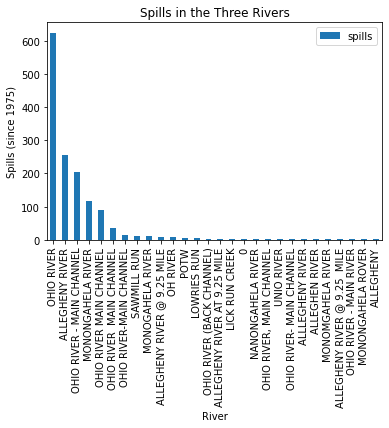

In [5]:
streams.plot.bar(title='Spills in the Three Rivers')
plt.xlabel("River")
plt.ylabel("Spills (since 1975)")

#### **Getting rid of typos**



In [6]:
streams = pgh_water['STREAM_NAME'].value_counts().rename_axis("stream").reset_index(name='spills')
print(streams)

                          stream  spills
0                     OHIO RIVER     625
1                ALLEGHENY RIVER     255
2      OHIO RIVER - MAIN CHANNEL     203
3              MONONGAHELA RIVER     116
4        OHIO RIVER MAIN CHANNEL      90
5       OHIO RIVER  MAIN CHANNEL      35
6        OHIO RIVER-MAIN CHANNEL      15
7                    SAWMILL RUN      12
8               MONOGAHELA RIVER      10
9    ALLEGHENY RIVER @ 9.25 MILE       8
10                      OH RIVER       7
11                          POTW       4
12                   LOWRIES RUN       4
13     OHIO RIVER (BACK CHANNEL)       3
14  ALLEGHENY RIVER AT 9.25 MILE       3
15                LICK RUN CREEK       3
16                             0       2
17             NANONGAHELA RIVER       2
18      OHIO RIVER, MAIN CHANNEL       2
19                    UNIO RIVER       1
20      OHIO RIVER- MAIN CHANNEL       1
21              ALLLEGHENY RIVER       1
22                ALLEGHEN RIVER       1
23             M

I reverted `streams` so that the river names were not the index column anymore.

In [7]:
ohio = 0
alle = 0
mono = 0

ohio_river = ['OHIO RIVER', 'OHIO RIVER - MAIN CHANNEL', 'OHIO RIVER MAIN CHANNEL',
              'OHIO RIVER  MAIN CHANNEL', 'OHIO RIVER-MAIN CHANNEL', 'OH RIVER', 
             'OHIO RIVER - MAIN RIVER', 'OHIO RIVER- MAIN CHANNEL', 'UNIO RIVER']
alle_river = ['ALLEGHENY RIVER','ALLEGHENY RIVER @ 9.25 MILE',
              'ALLEGHENY RIVER AT 9.25 MILE','ALLEGHEN RIVER','ALLEGHENY',
              'ALLLEGHENY RIVER']
mono_river = ['MONONGAHELA RIVER','MONOGAHELA RIVER','NANONGAHELA RIVER',
              'MONONGAHELA ROVER','MONOMGAHELA RIVER']

for index, row in streams.iterrows():
    stream_name = row['stream']
    spills = row['spills']
    if stream_name in ohio_river:
        ohio += spills
    elif stream_name in alle_river:
        alle += spills
    elif stream_name in mono_river:
        mono += spills

rivers = pd.Series({"Ohio": ohio, "Allegheny": alle, "Monongahela": mono})

rivers

Ohio           978
Allegheny      269
Monongahela    130
dtype: int64

#### Re-plotting

Text(0, 0.5, 'Spills (since 1975)')

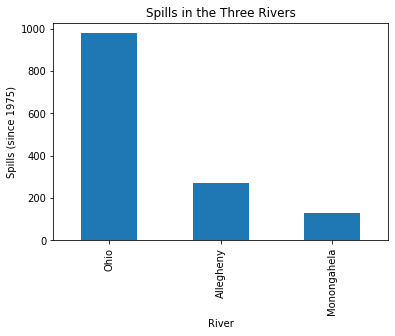

In [8]:
rivers.plot.bar(title='Spills in the Three Rivers')
plt.xlabel("River")
plt.ylabel("Spills (since 1975)")

It looks like the Monongahela is the best from a purely non-spill perspective. But Allegheny isn't too far behind, so I think a good conclusion so far would be to swim in any river that isn't the Ohio.

We shall see as I do more data plotting.

----

## Part 2: Neighboorhood-centric data

In [18]:
spills = dict()
quantity=0
for index, row in pgh_water.iterrows():
        zip_code = row['ZIP_CODE']
        zip_code = str(zip_code)
        zip_code = zip_code[:5]
        zip_code = int(zip_code)
        if zip_code in spills:
            spills[zip_code] = spills[zip_code] + 1
        else:
            spills[zip_code] = quantity
            
for i in range(15201,15234):
    if i not in spills:
        spills[i]=0

spills


{15226: 172,
 15233: 450,
 15201: 622,
 15225: 2321,
 15204: 143,
 15207: 360,
 15215: 64,
 15275: 44,
 15238: 307,
 15218: 50,
 15219: 21,
 15236: 13,
 15205: 69,
 15220: 36,
 15222: 4,
 15212: 30,
 15234: 14,
 15202: 34,
 15203: 47,
 15208: 17,
 15239: 14,
 15224: 0,
 15206: 7,
 15209: 0,
 15210: 0,
 15211: 0,
 15213: 0,
 15214: 0,
 15216: 0,
 15217: 0,
 15221: 0,
 15223: 0,
 15227: 0,
 15228: 0,
 15229: 0,
 15230: 0,
 15231: 0,
 15232: 0}

This data tells us how many spills there are per zip code in Pittsburgh. But without knowing what neighborhoods each zip code is related to the data is kind of useless.


In [24]:
zip_codes = {
'Lawrenceville' : 15201,
'N/A' :15202,
'Southside' : 15203,
'Sheraden':15204,
'Elliott':15204,
'Esplen':15204,
'Broadhead':15204,
'Crafton Heights':15205,
'East Liberty':15206,
'Morningside':15206,
'East End':15206,
'Morningside':15206,
'East End':15206,
'Hazelwood':15207,
'Greenfield':15207, 
'Glenwood':15207,
'Glen Hazel':15207,
'Hays':15207,
'Lincoln Place':15207,
'Homewood':15208,
'Brushton':15208,
'East End':15208,
'Point Breeze':15208,
"N/A":15209,
"N/A":15210,
"N/A":15211,
'Northside' : 15212,
"Oakland":15213,
"N/A":15214,
"N/A":15215,
"N/A":15216,
"N/A":15217,
'Regent Square':15218,
'Swisshelm Park':15218,
'Uptown':15219,
'Herron Hill':15219,
'Schenley Heights':15219,
'West End':15220,
'Wabash':15220,
'Westwood':15220,
'Banksville':15220,
'N/A':15221,
'Downtown' : 15222,
'N/A':15223,
'Bloomfield' : 15224,
'Garfield' : 15224,
'N/A':15225,
'Brookline' : 15226,
'Overbrook' : 15226,
'N/A':15227,
'N/A':15228,
'N/A':15229,
'N/A':15230,
'N/A':15231,
'N/A':15232,
'Manchester' : 15233,
'Northside' : 15233,
'Overbrook' : 15234,
}

for i in zip_codes:
    zip_codes[i] = spills[zip_codes[i]]
    

on_mon = {"South Shore":15219, 
          "Southside Flats":15203, 
          "Hays":15207,
          "Hazelwood":15217,
          "Glen Hazel":15207,
          "South Oakland":15213,
          "Bluff":15219, 
          "Central Business District":15222}

zip_codes = pd.Series(zip_codes)
zip_codes = zip_codes.sort_values()
df = pd.DataFrame(zip_codes)
df = df.reset_index()
df.columns=['neighborhood','spills']
df = df.drop(1)

df


,neighborhood,spills
0,Garfield,0
2,Oakland,0
3,Bloomfield,0
4,Downtown,4
5,East Liberty,7
6,Morningside,7
7,Overbrook,14
8,Point Breeze,17
9,Homewood,17
10,Brushton,17


Text(0, 0.5, 'neighborhood')

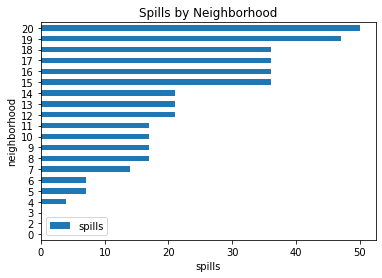

In [28]:
df2 = df.head(20)
df2.plot.barh(title='Spills by Neighborhood',)
plt.xlabel('spills')
plt.ylabel('neighborhood')

Looking at neighborhoods on the Monongahela: South Shore, Southside Flats, Hays, Hazelwood, Glen Hazel, South Oakland, Bluff, and the Central Business District (Downtown), in tandem with this data, it is clear to see that the best fit is (South) Oakland, with zero spills and proximity on the Monongahela.


## The Best Neighborhood

Due to its proximity to the Monongahela (the river with the least amount of spills) and its lack of spills as a whole, **South Oakland** is the best neighborhood for swimming in a triathalon.

That being said, when looking in comparison with the other two datasets, to maximize total efficiency, as long as whichever neighborhood that is ideal for biking and running has a close proximity to the Allegheny or Monongahela (i.e. not in North/West areas close to the Ohio), then that neighborhood would be a good choice (again, from a spill-centric perspective).

## Links

[The Pittsburgh Pool](https://3r2n.collinsandgoto.com/river-research/pittsburgh-pool/index.html)

[openwaterpgh](https://openwaterpgh.wordpress.com/)